# Assignment 3: Classical Hough Transform

## Ex. 3.1 Detect lanes and eyes

* there are two datasets available: "images/eye_tracking" and "images/lane_detection" - decide for one of them
* implement the classical Hough Transform for lines (for lane detection) OR circles (eye tracking) as shown in the lecture
* use a Canny edge detector to produce edge images for the sequence of images

(480, 640)
('maxima-laenge: ', 5716)
hi


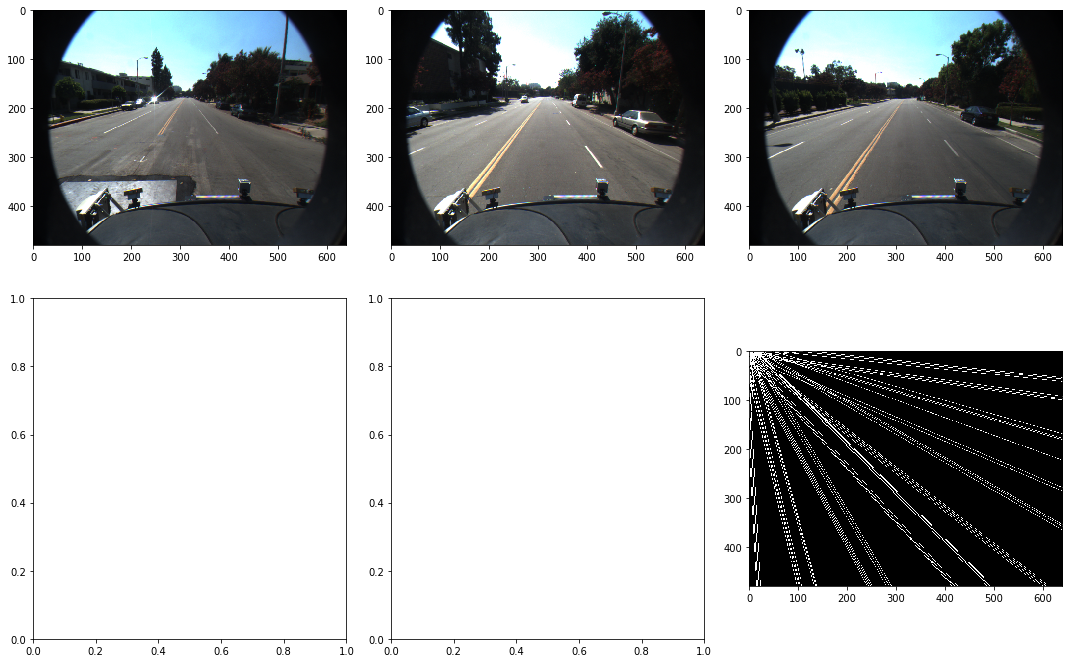

In [64]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage.draw import line
from skimage import io, data, feature, color
import numpy as np
import math

lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00050.png')
lane3 = io.imread('images/lane_detection/f00090.png')

#eye1 = io.imread('images/eye_tracking/0000.jpeg')
#eye2 = io.imread('images/eye_tracking/0050.jpeg')
#eye3 = io.imread('images/eye_tracking/0090.jpeg')

fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 3, 1)
ax12 = plt.subplot(2, 3, 2)
ax13 = plt.subplot(2, 3, 3)
ax21 = plt.subplot(2, 3, 4)
ax22 = plt.subplot(2, 3, 5)
ax23 = plt.subplot(2, 3, 6)

ax11.imshow(lane1)
ax12.imshow(lane2)
ax13.imshow(lane3)

grey1 = color.rgb2grey(lane1)
grey2 = color.rgb2grey(lane2)
grey3 = color.rgb2grey(lane3)

edge1 = feature.canny(grey1)
edge2 = feature.canny(grey2)
edge3 = feature.canny(grey3)


def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape

    #r = x*cosa + y*sina

    # compute start and end point of line 
    x0 = 0
    y0 = int((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a)))
    x1 = dimx
    y1 = int((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a)))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

def Hough(img):
    
    #akku erstellen
    diagonale = int(math.sqrt((img.shape[0])**2+(img.shape[1])**2))
    winkel_anzahl = 73
    accumulator = np.zeros((winkel_anzahl,diagonale))
    schon_besucht = accumulator
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if(img[x][y]):
                    
                for a in range(winkel_anzahl):
                    laenge_r = int(x*math.cos(a*2) + y*math.sin(a*2))
                    accumulator[a][laenge_r] +=1

    #TODO 100 strkste kanten extrahieren
    #Achter(accumulator, 20, 30)
    maxima = []
    for r in range(1,diagonale-1):
        for a in range(1,winkel_anzahl-1):
        
            achterTest = Achter(accumulator,a,r)
            
            if (achterTest == (0,0)):
            
                maxima.append([int(a*360/winkel_anzahl),int(r)])
            #else:

    print("maxima-laenge: ",len(maxima))
    #neues bild erstellen und kanten einzeichnen
    out_img = np.zeros((img.shape[0],img.shape[1]))

    print("hi")
    m=0
    for q in range(1,100):
        if m < 100:
            out_img = draw_line_hessian_normal(out_img,maxima[q][0],maxima[q][1])
            m +=1
            
    io.imshow(out_img)
    
def Achter(accumulator, x, y):
    arr = [accumulator[x-1][y-1],accumulator[x][y-1],accumulator[x+1][y-1],accumulator[x-1][y],accumulator[x][y],accumulator[x+1][y],accumulator[x-1][y+1],accumulator[x][y+1],accumulator[x+1][y+1]]
    #der index des maximalen elements
    max_elem_index = (arr.index(max(arr)))
    return(((max_elem_index % 3) -1),(math.floor(max_elem_index/3))-1)

print(edge1.shape)

Hough(edge1)
#ax21.imshow(edge1)

#ax21.imshow(edge1)
#ax22.imshow(eye2)
#ax23.imshow(eye3)

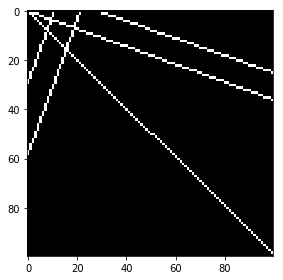

In [67]:
# dieser Code wurde als Musterlösung von Sebastian Oltmanns zur Verfügung gestellt und von Tim renoviert

%matplotlib inline
from skimage.draw import line
from skimage import io
import math
import numpy as np

image = np.zeros((100,100))
image = draw_line_hessian_normal(image, 20, 20)
image = draw_line_hessian_normal(image, 20, 10)
image = draw_line_hessian_normal(image, 110, 0)
image = draw_line_hessian_normal(image, -70, 10)
image = draw_line_hessian_normal(image,135,0)

io.imshow(image)

## line detection for lane detection 

* use your implementation of the Hough Transform to find the 10 strongest lines in the image
* display your result set (draw those lines on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw lines again! (**BONUS**)

## circle detection for eye detection
* use your implementation of the Hough Transform to find the 10 strongest circles in the image
* display your result set (draw those circles on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw circles again! (**BONUS**)

# Ex. 3.2 Generalized Hough Transform

* implement the Generalized Hough Transform as described in the lecture for localizing a given template
* find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

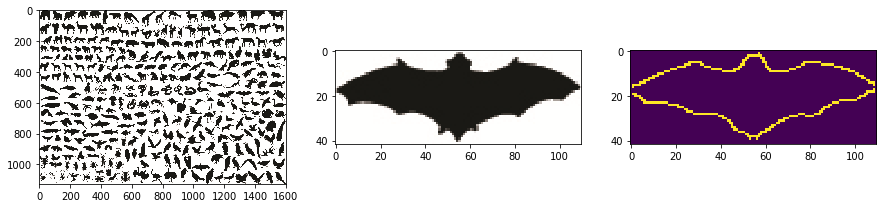

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

animals = io.imread('images/animals.png')

xmin = 1271
xmax = 1381
ymin = 519
ymax = 561

bat = animals[ymin:ymax, xmin:xmax]
bat_edge = feature.canny(color.rgb2gray(bat), 2)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge)

* now implement an extended version of the GHT that find rotated and scaled variants of the template. 
* find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.gif")
* note that you can binarize your italy template by using a simple color lookup
* draw the location of italy on the map and print its scale and orientation (**RESULT**)